In [1]:
# !pip install scipy

In [2]:
import numpy as np  
import pandas as pd  # для работы с таблицами

from scipy import stats # При работе со статистикой

import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import seaborn as sns # Более продвинутая библиотека для визуализации

# «Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок »


In [3]:
#Вспомогательная функция для подсчета доверительного интервала
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    delta = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m - delta, m + delta 

In [4]:
a =  [5,7,7,9,10,16,7,14,13,15,16,15,
     16,17,18,13,14,15,6,13, 14, 12 ,13 ]

print(mean_confidence_interval(a, 0.60))
print(mean_confidence_interval(a, 0.90))

(11.707786838827133, 13.074821856825043)
(11.02521592553596, 13.757392770116216)


In [5]:
# stats.sem?

<h3 style="text-align: center;"><b>Выборы в президенты или зачем нам доверительные интерваллы?!</b></h3>

<p style="align: center;"><img align=center src="https://www.englisch-hilfen.de/images/usa/states/map.gif"  width=400></p>



<div class="alert alert-info">
<b>Задача: </b>
    
Попробуем с помощью доверительного интервала оценить, какое минимальное количество штатов надо взять, чтобы определить будущего президента
</div>

In [5]:
US_elect_county = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/2012_US_elect_county.csv'
 
df = pd.read_csv(US_elect_county, sep=',',  error_bad_lines=False) # Откроем датасет

2021-11-24 10:57:15,780 [5560] WARNING  py.warnings:109: [JupyterRequire] C:\Users\sasha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)



In [6]:
df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования
df.head()

,State Postal,County Name,%
0,AK,Alaska,41.6
1,AK,Alaska,41.6
2,AL,Alabama,38.4
3,AL,Autauga,26.6
4,AL,Baldwin,21.6


Среднее по всей выборке:  44.07946954813346


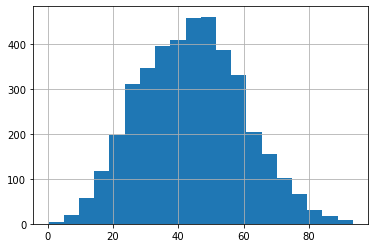

In [8]:
df['%'].hist(bins=20)
print('Среднее по всей выборке: ',df['%'].mean())

In [10]:
some_states_1 = ['AK','OH','WV','ME','CA','MD'] # Некоторая выборка штатов 
some_states_2 = ['WA','AK','DE']

sub_df = df.loc[df['State Postal'].isin(some_states_2)]  # Выборка по нескольким штатам

l, r = mean_confidence_interval(sub_df['%'], 0.99)
l, r

(42.025084908626724, 50.444480308764554)

In [10]:
#df['State Postal'].value_counts()  # Раскомментить, если интересно соотношение штатов. 

<p style="align: center;"><img align=center src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQM7ZUiNIwL4fZho5F7zqWpLBw-eL-Ttg0-UA&usqp=CAU"  width=400></p>
 

<div class="alert alert-info">
<b>Другой пример: </b>
    
Рассмотрим такой случай. Допустим, вы журналист и оказались в 2016 году в преддверии выборов президента в США. Вы хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах. Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%???
</div>

<div class="alert alert-info">
    
Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приближенно равно 15. Пусть погрешность измерений $\Delta$ = 5. Таким образом, обозначим стандартное отклонение $\sigma$ = 15 и квантиль нормального распределения Z = 1,96.

</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [11]:
sigma = 15  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения. 
Delta = 5 #%         #Погрешность

In [12]:
N = int(((sigma*Z)/Delta)**2)
N

34

In [13]:
# len(df)

# Проверим разумность наших расуждений:

Стандартное отклонение:  15.742396788859033
Среднее:  44.07946954813346


<AxesSubplot:>

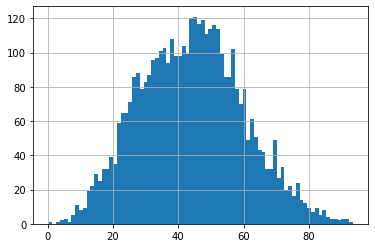

In [13]:
df = df['%']
print('Стандартное отклонение: ', df.std())
print('Среднее: ', df.mean())
df.hist(bins=80)

In [15]:
MEAN = df.sample(n = int(N)).mean()  # Возьмем выборку из случайных n значений

print('Среднее выборки: ', MEAN)
print('Среднее генеральной совокупности: ', df.mean())

print('Доверительный интервал: (', MEAN-Delta, ', ', MEAN+Delta, ')', sep='')

Среднее выборки:  40.7735294117647
Среднее генеральной совокупности:  44.07946954813346
Доверительный интервал: (35.7735294117647, 45.7735294117647)


In [16]:
# df.boxplot(by='%')

In [17]:
# from scipy.stats import norm
# norm.ppf(0.95, loc=0, scale=1)


# Проверка гипотез с помощью Python. 

## Представители разных профессий и t-test

<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

In [15]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


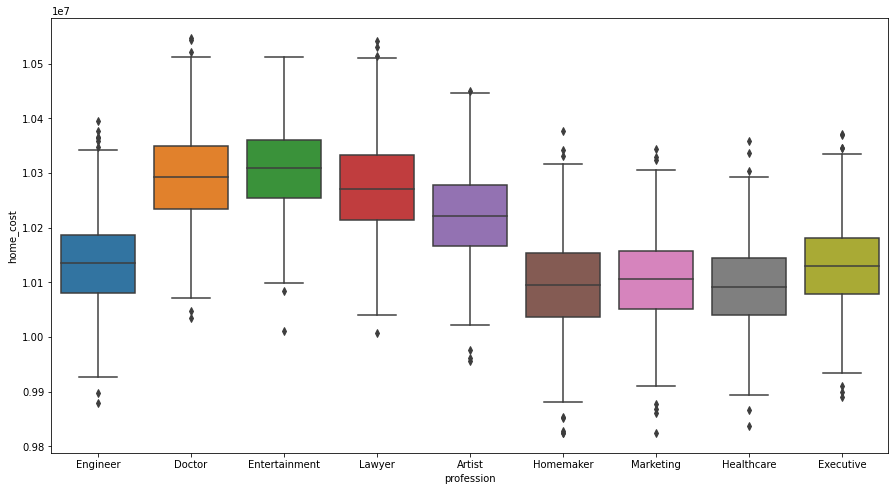

In [16]:
data = data[data['home_cost'] < 18000000] #Обрежим выбросы

plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x="profession", y="home_cost");

## T-test (для двух выборок).
Самый важный!

<div class="alert alert-info">
<b>Описание: </b>
Такой тест показывает, имеют ли две выборки данных разные средние значения (Теперь у нас две разные выборки, а не одна!). Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние. Для этого нам не нужен известный параметр численности.
</div>

<div class="alert alert-info">
<b>Гипотеза: </b>

Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

In [18]:
from scipy import stats  # Импортируем библиотеку


Engineer_salary = data[data['profession']=='Engineer']['salary']
Entertainment_salary = data[data['profession']=='Entertainment']['salary']

# Так как распределение похоже на нормальное, то берем Критерий Стьюдента

t, p_value  = stats.ttest_ind(Engineer_salary, Entertainment_salary) # Критерий Стьюдента (t-test)

print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Выборки отличаются!')

p-value 0.0
Выборки отличаются!


<div class="alert alert-success">


Мы получаем хорошее значение p, равное 0.0, и, таким образом, мы отклоняем нулевую гипотезу, то есть - средние значения двух распределений различны и это различие статистически значимо

<div class="alert alert-info">
    
И действительно, если посмотреть на выборки визуально

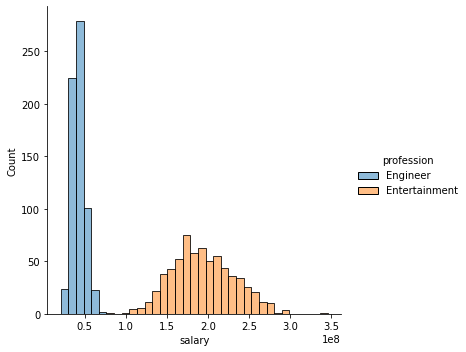

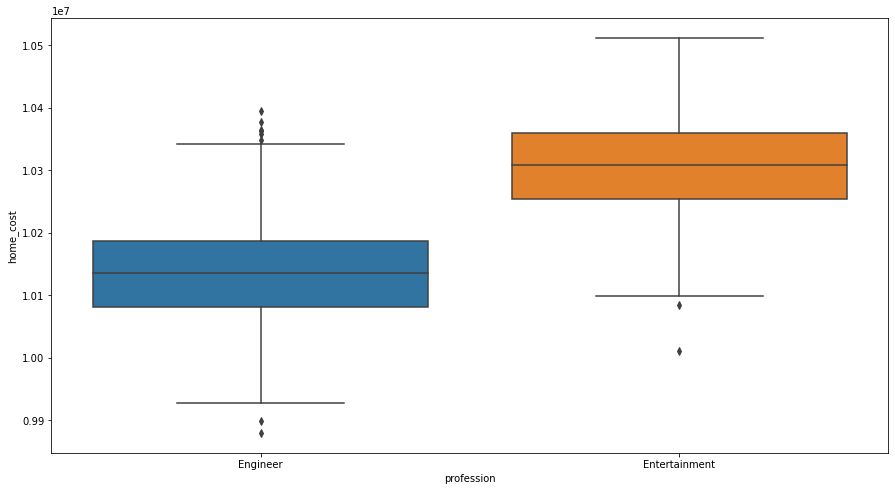

In [21]:
sub_data =  data[(data['profession']=='Engineer')|(data['profession']=='Entertainment')]

sns.displot(sub_data, x='salary', hue ='profession', bins=35)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="profession", y="home_cost");

<div class="alert alert-info">
<b>Гипотеза: </b>

Правда ли, что дома домахозяйки (Homemaker) живут в домах, которые в среднем дороже или дешевле, чем дома врачей (Healthcare)?

In [19]:
# 'Homemaker', 'Marketing', 'Healthcare', 


Homemaker = data[data["profession"] == 'Homemaker']["home_cost"]
Healthcare = data[data["profession"] == 'Healthcare']["home_cost"]

# Так как распределение нормальные, то берем Критерий-Стьюдента

t, p_value  = stats.ttest_ind(Homemaker, Healthcare)

t, p_value 

(0.29652382992761006, 0.7668756483783727)

<div class="alert alert-info">
    
И действительно, если посмотреть на выборки визуально

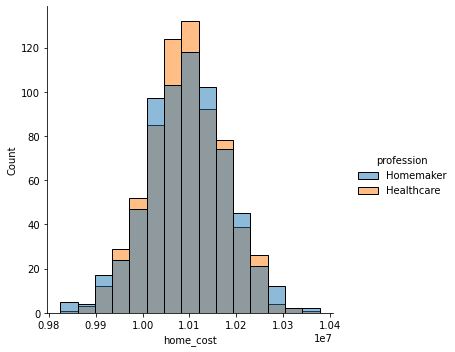

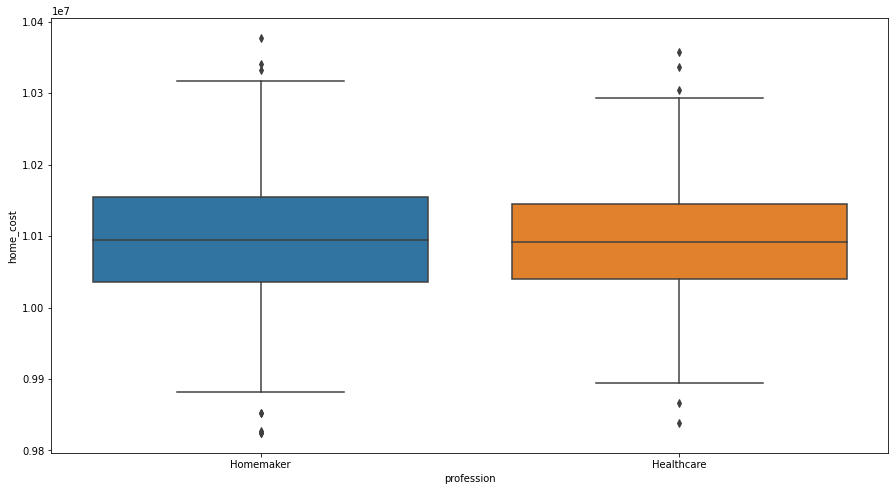

In [20]:
sub_data =  data[(data['profession']=='Homemaker')|(data['profession']=='Healthcare')]
sns.displot(sub_data, x="home_cost", hue="profession", bins=15)


plt.figure(figsize=(15, 8))
sns.boxplot(data=sub_data, x="profession", y="home_cost");

<div class="alert alert-info">
<b>Ремарка: </b>
    
t-tест (Критерий Стьюдента имеет несколько разновидностей, ниже приведены еще две). 

## 1. Одновыборочный T-test (Выборка + ГС)

<div class="alert alert-info">
<b>Описание: </b>
Давайте попробуем это на одном образце. Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим некоторое количество голосующих из Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Сейчас выясним!
</div>

In [25]:
from scipy import stats
np.random.seed(42)

population_ages1=stats.norm.rvs(loc=20, scale=45, size=15000)   
population_ages2=stats.norm.rvs(loc=20, scale=10, size=10000)
population_ages=np.concatenate((population_ages1,population_ages2))  # Сгенерировали всю популяцию. 

india_ages1=stats.norm.rvs(loc=19, scale=65, size=2000)  # Индия 1
india_ages2=stats.norm.rvs(loc=19, scale=55, size=2000)
india_ages=np.concatenate((india_ages1, india_ages2)) #Выборка
print('Средний возраст всего мира',population_ages.mean())
print('Средний возраст индусов',india_ages.mean())

Средний возраст всего мира 20.05285494883601
Средний возраст индусов 18.637370653568478


In [26]:
t_value, p_value = stats.ttest_1samp(a=india_ages, popmean=population_ages.mean())
print('t_value', t_value, 'p_value', p_value)

t_value -1.4937509836536451 p_value 0.13531961104529197


<div class="alert alert-success">

Теперь это значение `t=-1.493` говорит нам, насколько отклоняется выборочное среднее от нулевой гипотезы.

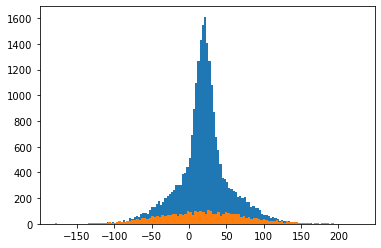

In [27]:
plt.hist(population_ages, bins=120); # Вся популяция.
plt.hist(india_ages, bins=120);  # Выборка

### 2. Парный T-test (Сравнение зависимых)

<div class="alert alert-info">
<b>Описание: </b>
    
T-критерий парной выборки, иногда называемый `t-критерием` зависимой выборки, представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. В парном выборочном `t-тесте` каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. Общие применения парного `t-критерия` выборки включают исследования случай-контроль или планы повторных измерений. 

 Предположим, вас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного `t-критерия`. 
</div>

In [28]:
np.random.seed(42)
before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -.273, size = 100)
weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,246.884604,246.723127,-0.161477
std,27.245053,27.010808,4.768345
min,171.407647,172.518101,-9.866856
25%,231.972830,229.732678,-4.301303
50%,246.191311,247.144815,0.147536
75%,262.178562,261.714136,2.417852
max,305.568346,306.534314,13.327846


In [29]:
stats.ttest_rel(a=before, b=after)

Ttest_relResult(statistic=0.33864384912652695, pvalue=0.7355952264426646)

**Итак, мы видим, что у нас есть только 1% шансов найти такие различия между образцами случайно.**

<div class="alert alert-info">
<b>Дополнительно: </b>
    
Помимо проверки, что выборки могу значимо различаться, t-Тест еще полезен при поиске выбросов в данных.
</div>

# Точный критерий Фишера  и  Критерий пирсона ($\chi^{2}$)

<div class="alert alert-info">
<b>Вспомним: </b>
    
Критерий Стьюдента позволяет работать с численными переменными, но не позволяет работать с категориальными. Для этого существует критерий Фишера (или Хи-квадрат). Одна из его задач сказать, насколько случайно распределены значения между группами. Позволяет проверить гипотезу, есть ли значимый перевес между группами. Смотри пример в лекции.
    
</div>

<div class="alert alert-info">
<b>Пример: </b>
    
Например, вы хотите проверить нет ли дискриминации 
по половому признаку в сфере Data Science.
Вы узнали, что в какой-то компании после серии собеседований 
107 мужчин взяли на работу, а отказали 93-м мужчинам. 
А среди женщин 74 взяли, а отказали 45-и.
Относится ли руководство компании 
предвзято к мужчинам или к женщинам?
    
</div>

In [23]:
import scipy as spy

x = [[107, 93], 
     [74, 45]]

print(x)
_, pvalue, _, _ = spy.stats.chi2_contingency(x) # fisher_exact(x) # Точный тест Фишера
 
pvalue

[[107, 93], [74, 45]]


0.16232055194403144

# Критерий Пирсона (он же $\chi^{2}$ )

**Пример использования Хи-квадрат теста**

<div class="alert alert-info">
<b>Пример: </b>
    
Например, вы хотите проверить правда ли эксперт по `Data Science` таковым является. Вы составили список вопросов, спросили эксперта и случайных прохожих. Количество правильный вопросов по каждому разделу вы записали в таблицу (таблица смежности)

Выясните, исходя из полученных данных, действительно ли перед вами носитель экспертности или пока что еще не очень опытный начинаюший?
    
</div>

In [25]:
import scipy as spy
from scipy import stats

# Сгенерируем случайную матрицу/табличку 2х2
contingency_table = pd.DataFrame(
    [  
[22, 99, 59],
[10, 12, 31]
    ],
    columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Эксперт', 'Случайный прохожий'])

print('Реальная таблица')
print(contingency_table)


Реальная таблица
                    Machine Learning  Data Science  Analytics
Эксперт                           22            99         59
Случайный прохожий                10            12         31


**В качестве проверки мы можем сравнить p-значение и уровень значимости. Если значение p <уровня значимости, мы отклоняем нулевую гипотезу.**

In [26]:
chi, pval, dof, exp = stats.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)


significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))

print(pval)
if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
    print('Это правда эксперт!')
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.""" % (significance))
    
    
# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value=0.000173, significance=0.05

0.00017303774198262266
На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.
Это правда эксперт!


# Рынок жилья в New York City  или Трюк с распределением

New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)

<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png
"  width=400></p>


<div class="alert alert-info">
<b>Предостирежение: </b>
    
Для построения доверительного интервала с помощью метода, показанного выше, важно, чтобы распределение исследуемой выборки имело нормально распределение
</div>

In [27]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.dropna(how='any',inplace=True)
df.head(3)

2021-11-24 11:21:32,151 [5560] WARNING  py.warnings:109: [JupyterRequire] C:\Users\sasha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


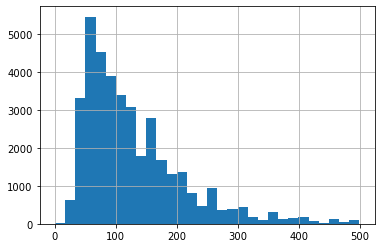

In [28]:
df[df.price<500].price.hist(bins=30);

In [35]:
print('Можно ли использовать тут наш подход?')

Можно ли использовать тут наш подход?


# Теперь сделаем распределение нормальным

<AxesSubplot:>

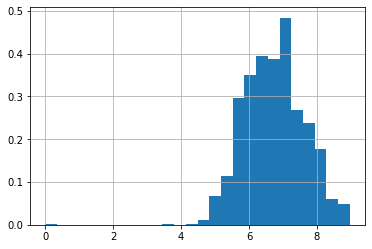

In [29]:
np.log2(abs(df[df.price<500].price)+1).hist(bins=26, density=True)

In [37]:
# df.neighbourhood_group.hist()

In [38]:
print(df[df.price<400].price.mean())

data = df[(df.neighbourhood_group == 'Brooklyn') | (df.neighbourhood_group=='Staten Island') | (df.neighbourhood_group=='Queens')].price

mean_confidence_interval(data, confidence=0.999) # Возможно вам понадобиться эта функция.

122.56345677697612


(111.68856960410567, 119.29919123997406)

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [ ]:
### Ваши код/вычисления...

n = ....  #Запишите в эту переменную ваш высчитанный ответ!


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [ ]:
### Ваши код/вычесления...

L = ....  #Запишите в эту переменную ваш высчитанный ответ!


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [ ]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

### Ваш код...


### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [ ]:
### Ваш код...

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [ ]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

In [ ]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact('Тут должна быть ваша таблица, а не этот текст')#Возможно пригодится эта функция.

### Ваш код...

<div class="alert alert-info">
<b>Задание № 5</b> 

Постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6, 7,9,8,6,
        1, 11, 2, 3, 1, 4, 4, 5,7,8,9,6,7,5,8,6,7,9,6,
        7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,
        5,8,6,7,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,
        5,7,8,9,6,7,5,8,6,7,9,6,7,5,6,7,8,5,6,7,0,9,8,
        4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 

#Ваш код:

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
### Ваши выводы:

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test